# preliminaries

In [2]:
def add_to_class(Class):
    def wrapper(func):
        setattr(Class, func.__name__, func)
    return wrapper

In [30]:
import numpy as np
import pandas as pd

DATA_PATH = "./Code and Dataset/TSP.csv"
data = pd.read_csv(DATA_PATH)
data

,CUST NO.,XCOORD.,YCOORD.,PROFIT,READY TIME,DUE TIME
0,1,26.858821,19.500194,321.10,0,862
1,2,0.169784,22.714500,192.17,273,289
2,3,23.498596,10.081659,442.29,2,61
3,4,7.391482,35.599626,150.19,278,318
4,5,29.674603,36.910762,366.60,447,481
...,...,...,...,...,...,...
95,96,13.552258,14.938513,195.02,152,244
96,97,9.463261,15.974178,238.57,169,229
97,98,2.622345,23.379464,225.17,245,317
98,99,29.883761,18.766507,301.29,98,196


In [31]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deap import base
from deap import creator
from deap import tools

# plotting

In [32]:
def plotting(
    cls,
    *input,
    population_size: list[int],
    mutation_rate: list[float],
    crossover_rate: list[float],
    generations: int,
):
    for param_name in ['population_size', 'mutation_rate', 'crossover_rate']:
        param = locals()[param_name]
        fig, ax = plt.subplots(nrows=1, ncols=len(param), figsize=(15, 5))
        for idx, p in enumerate(param):
            param_dict = {param_name: p, "generations": generations}
            print(param_dict)
            cls_tmp = cls(*input, **param_dict)
            cls_tmp.run()
            ax[idx].plot(list(range(1, generations+1)), cls_tmp.best_fitness)
            ax[idx].set_title(f'{param_name}: {p}')
            ax[idx].set_xlabel('Generations')
            ax[idx].set_ylabel('Best Fitness')
        plt.show()


# Classical TSP

In [33]:
class ClassicalTSP:
    def __init__(
        self,
        customers: np.ndarray,
        population_size: int = 100,
        mutation_rate: float = 0.01,
        crossover_rate: float = 0.8,
        generations: int = 1000,
        indpb: float = 0.05,
        tournsize : int = 3,
    ):
        self.customers = customers
        self.n = len(customers)
        self.dist = np.zeros((self.n, self.n))
        # parameters for genetic algorithm
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.indpb = indpb
        self.tournsize = tournsize
        
        # statistics in each generation
        self.best_fitness = []
        self.best_individual = []

In [34]:
@add_to_class(ClassicalTSP)
def dis_matrix(self):
    for i in range(self.n):
        for j in range(self.n):
            self.dist[i][j] = np.linalg.norm(self.customers[i] - self.customers[j])

In [35]:
@add_to_class(ClassicalTSP)
def evaluate(self, individual):
    # Calculate the total distance of the route
    distance = 0
    for i in range(1, len(individual)):
        distance += self.dist[individual[i-1]][individual[i]]
    distance += self.dist[individual[-1]][individual[0]]
    return distance,

In [36]:
@add_to_class(ClassicalTSP)
def main(self):
    # define framework
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # single objective
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(self.n), self.n)
    toolbox.register(
        "individual", tools.initIterate, creator.Individual, toolbox.indices
    )
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", self.evaluate)
    toolbox.register("mate", tools.cxOrdered)  # crossover
    toolbox.register(
        "mutate", tools.mutShuffleIndexes, indpb=self.indpb
    )  # indpb: independent probability of each attribute to be mutated
    toolbox.register("select", tools.selTournament, tournsize=self.tournsize)  # selection
    
    # create initial population
    population = toolbox.population(n=self.population_size)

    # GA loop
    for gen in range(self.generations):
        # evaluate fitness
        fitnesses = toolbox.map(toolbox.evaluate, population) 
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit # assign evaluated fitness to individual
        # select the next generation
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        # apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < self.crossover_rate:
                toolbox.mate(child1, child2) # crossover
                del child1.fitness.values, child2.fitness.values
        for mutant in offspring:
            if random.random() < self.mutation_rate:
                toolbox.mutate(mutant) # mutation
                del mutant.fitness.values
        # replace the current population by the offspring
        population[:] = offspring
        # save best fitness of current generation
        best_ind = tools.selBest(population, 1)[0]
        self.best_fitness.append(best_ind.fitness.values[0])
        self.best_individual.append(best_ind)
    
        

In [37]:
@add_to_class(ClassicalTSP)
def format(self):
    """
    Format the solution as np.ndarray.
    """
    self.best_individual = np.array(self.best_individual)
    self.best_fitness = np.array(self.best_fitness)

In [38]:
@add_to_class(ClassicalTSP)
def run(self):
    self.dis_matrix()
    self.main()
    self.format()
    

## execution

{'population_size': 100, 'generations': 1000}
{'population_size': 200, 'generations': 1000}


/home/zqy/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/zqy/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


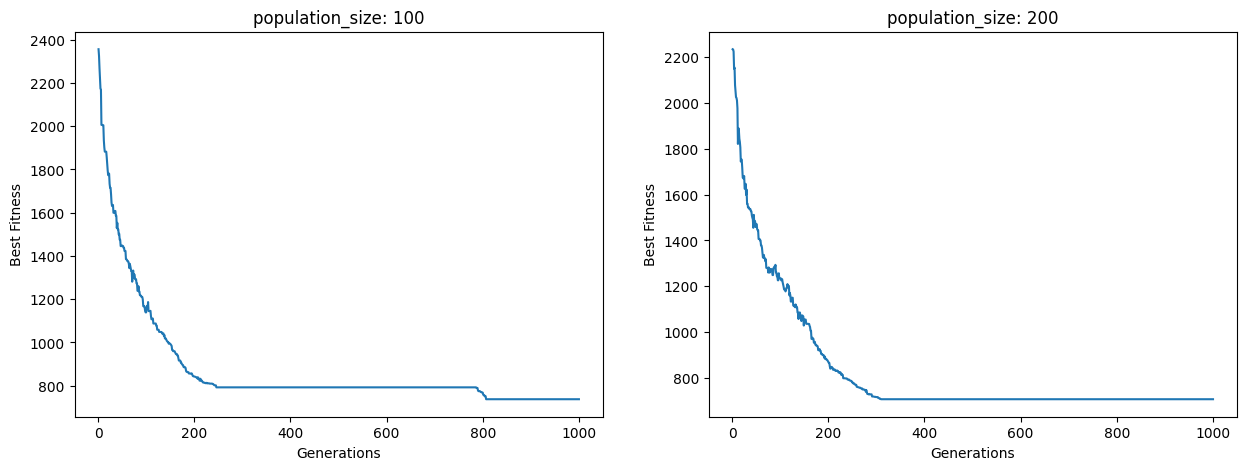

{'mutation_rate': 0.01, 'generations': 1000}
{'mutation_rate': 0.05, 'generations': 1000}


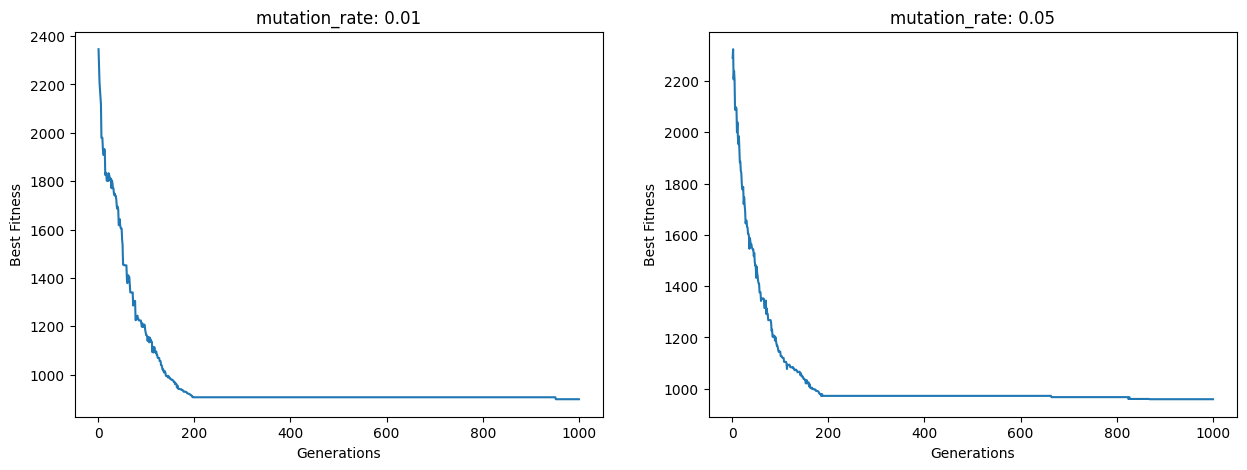

{'crossover_rate': 0.1, 'generations': 1000}
{'crossover_rate': 0.2, 'generations': 1000}


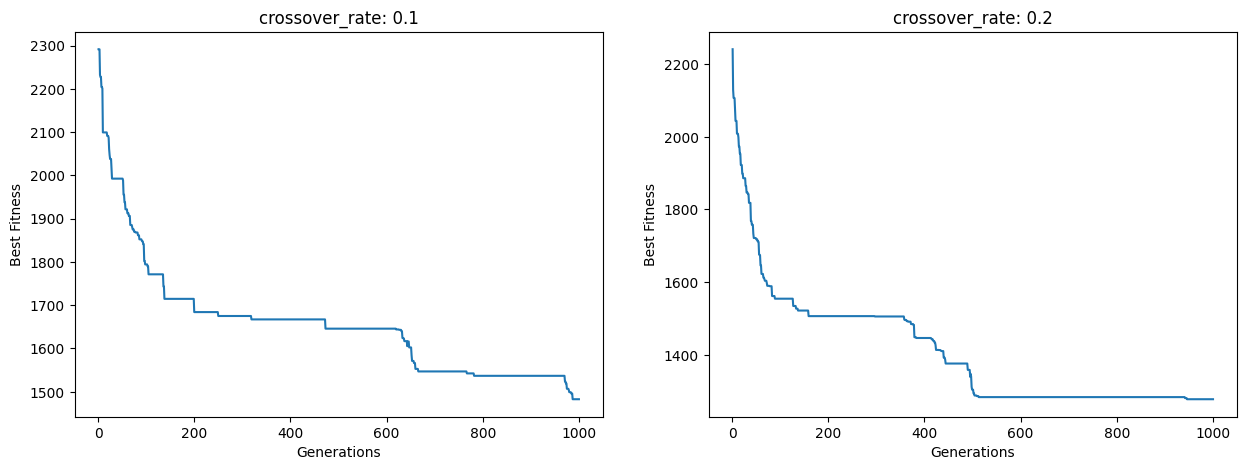

In [11]:
customers = data.iloc[:, 1:3].to_numpy()

# 注意：population_size 一定要大于 100, 否则会报错, 我不知道为什么
plotting(ClassicalTSP, customers, population_size=[100, 200],
         mutation_rate=[0.01, 0.05], crossover_rate=[0.1, 0.2],
         generations=1000)


In [37]:
# single test
customers = data.iloc[:, 1:3].to_numpy()
classical1 = ClassicalTSP(customers=customers, generations=1000, population_size=200)
classical1.run()

In [38]:
classical1.best_individual.shape

(1000, 100)

# large-scale optimization with clustering


1. we apply K-means clustering to split original data into k clusters. 

2. we compute the minimal fitness of each cluster. 

3. we replace each cluster with its central point, and compute the new fitness of the central point set.

In [5]:
# data generation
customers = data.iloc[:, 1:3].to_numpy()
n = customers.shape[0]
customers_large = np.vstack(
    (customers, customers + np.hstack((np.ones((n, 1)), np.zeros((n, 1)))))
)

In [6]:
customers_large.shape

(200, 2)

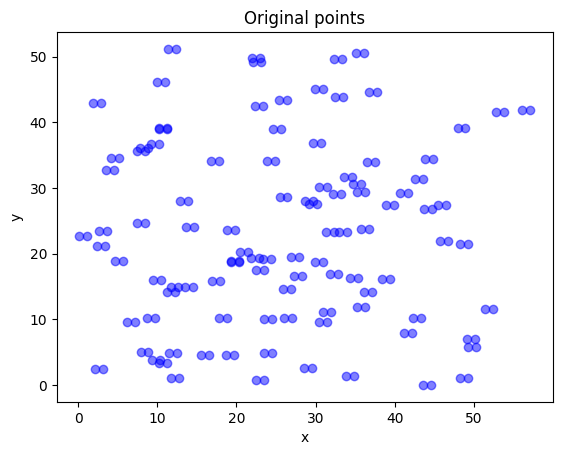

In [7]:
def scatter_original(X: np.ndarray):
    plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', alpha=0.5)
    plt.title('Original points')
    plt.xlabel('x')    
    plt.ylabel('y')
    plt.show()
scatter_original(customers_large)

In [41]:
class LargeScaleGeneticAlgorithm:
    pass

In [42]:
@add_to_class(LargeScaleGeneticAlgorithm)
def __init__(self,
             customers_large,
             n_clusters):
    self.customers_large = customers_large
    self.n_clusters = n_clusters

    self._clusters_list = [np.array([]) for _ in range(n_clusters+1)]
    self._clusters_centres = np.array([])
    self._tsp_list = [] # size is (n_clusters+1)
    self.kmeans = None

In [56]:
from sklearn.cluster import KMeans

@add_to_class(LargeScaleGeneticAlgorithm)
def kmeans(self,max_iter=100, tol=1e-4):
    """
    return: a list of cluster points
    """
    kmeans = KMeans(n_clusters=self.n_clusters, max_iter=max_iter, tol=tol)
    kmeans.fit(self.customers_large)
    labels = kmeans.labels_
    self._clusters_centres = kmeans.cluster_centers_
    for i in range(self.n_clusters):
        self._clusters_list[i] = self.customers_large[labels == i]
    self._clusters_list[self.n_clusters] = self._clusters_centres
    self.kmeans = kmeans
    

In [67]:
@add_to_class(LargeScaleGeneticAlgorithm)
def classical_tsp(self):
    """
    self._clusters_list: a list of cluster points, and centre points
    return: a list of tsp solutions
    """
    for i in range(len(self._clusters_list)):
        customers = self._clusters_list[i]
        # add the parameter `params` to the function below!!!!!! 
        tsp = ClassicalTSP(customers=customers, generations=100, population_size=200)
        tsp.run()
        self._tsp_list.append(tsp)
    

In [68]:
@add_to_class(LargeScaleGeneticAlgorithm)
def plot(self):
    plt.figure(figsize=(10, 10))
    plt.scatter(
        self.customers_large[:, 0],
        self.customers_large[:, 1],
        c="b",
        marker="o",
        alpha=0.5,
    )
    # plot of cluster points, and centre points
    for tsp in self._tsp_list:
        linestyle = "--" if tsp == self._tsp_list[-1] else "-"
        best_individual = tsp.best_individual[-1]
        plt.plot(
            np.hstack((tsp.customers[best_individual][:, 0],
                        tsp.customers[best_individual[0]][0])),
            np.hstack((tsp.customers[best_individual][:, 1],
                        tsp.customers[best_individual[0]][1])),
            linestyle=linestyle,
        )
    # draw the contourf of each cluster
    x_min, x_max = self.customers_large[:, 0].min() - 1, self.customers_large[:, 0].max() + 1
    y_min, y_max = self.customers_large[:, 1].min() - 1, self.customers_large[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = self.kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    # 我画的图也太好看了吧，哈哈，明天去深圳耍咯
    plt.show()

In [46]:
@add_to_class(LargeScaleGeneticAlgorithm)
def run(self):
    self.kmeans()
    self.classical_tsp()
    self.plot()
    

## execution

/home/zqy/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/zqy/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


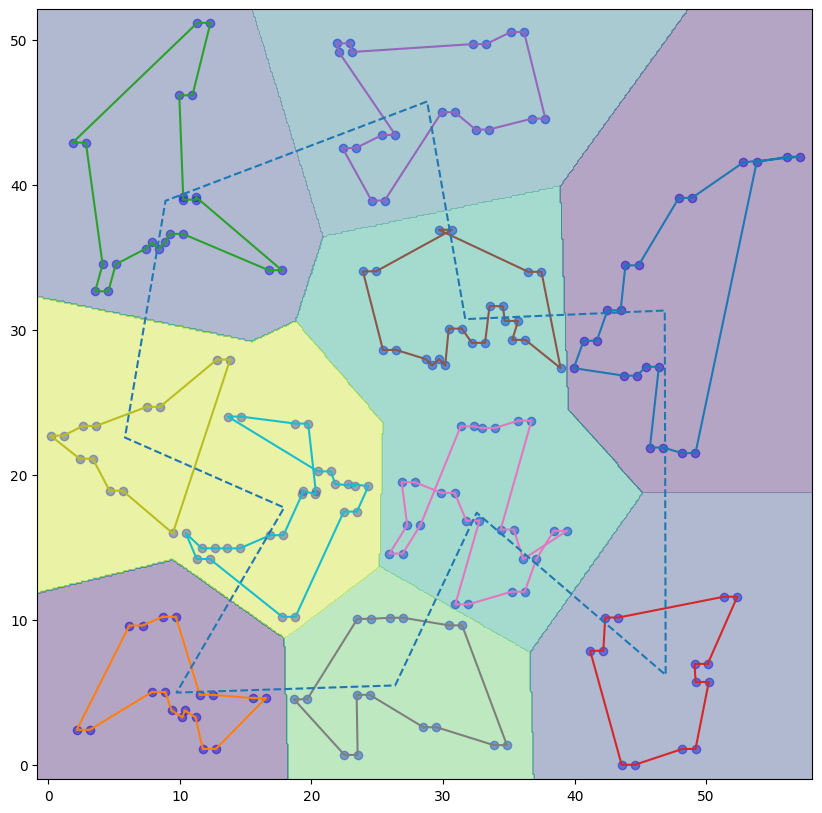

In [69]:
large_scale = LargeScaleGeneticAlgorithm(customers_large, 10)
large_scale.run()

dotted line is the centres route, normal line is route of each clusters.

# multi-objective optimization 
to be continued...